# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [4]:
from sklearn.linear_model import LinearRegression
from dataset import get_boston_dataset
from sklearn.preprocessing import StandardScaler

In [5]:
X_train, X_test, y_train, y_test= get_boston_dataset()

In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [7]:
lr= LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [8]:
X= X_train.copy()

In [9]:
X['y']=y_train

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,16.6


In [11]:
# 학습후 각 feature들에 곱할 가중치들.
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753,  0.59408776, -1.80876877,
        2.60991991, -0.19823317, -3.00216551,  2.08021582, -1.93289037,
       -2.15743759,  0.75199122, -3.59027047])

In [12]:
# bias (편향-절편)
lr.intercept_

22.608707124010557

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

##### 평가

In [14]:
# 추론
pred_1=lr.predict(X_train_scaled[0].reshape(1,-1))
pred_1

array([13.54334096])

In [15]:
X_train_scaled[0] @ lr.coef_ + lr.intercept_

13.543340962285864

In [50]:
pred_train=X_train_scaled @ lr.coef_ + lr.intercept_

In [56]:
pred_train.reshape(-1,1)

array([[13.54334096],
       [21.03611757],
       [35.25707372],
       [19.31180705],
       [12.9193462 ],
       [13.83454251],
       [22.66868871],
       [14.2409856 ],
       [31.24023391],
       [25.2746277 ],
       [15.13346462],
       [24.27169368],
       [ 9.08842615],
       [14.82179159],
       [21.01155502],
       [32.97485525],
       [27.96169238],
       [25.76241079],
       [15.56154982],
       [31.08187689],
       [28.10293564],
       [13.79628381],
       [ 7.39293584],
       [28.48119204],
       [25.40996121],
       [ 4.34170732],
       [28.48040075],
       [17.16788093],
       [29.49717483],
       [20.3114614 ],
       [15.95499192],
       [17.81088079],
       [12.68905582],
       [ 8.44914207],
       [19.28629969],
       [34.45678405],
       [32.9718556 ],
       [23.57990095],
       [19.63359906],
       [22.95623269],
       [26.85871334],
       [21.77624643],
       [16.93785832],
       [32.00415847],
       [10.62790654],
       [19

In [48]:
X_train_scaled @ lr.coef_.reshape(-1,1) + lr.intercept_

array([[13.54334096],
       [21.03611757],
       [35.25707372],
       [19.31180705],
       [12.9193462 ],
       [13.83454251],
       [22.66868871],
       [14.2409856 ],
       [31.24023391],
       [25.2746277 ],
       [15.13346462],
       [24.27169368],
       [ 9.08842615],
       [14.82179159],
       [21.01155502],
       [32.97485525],
       [27.96169238],
       [25.76241079],
       [15.56154982],
       [31.08187689],
       [28.10293564],
       [13.79628381],
       [ 7.39293584],
       [28.48119204],
       [25.40996121],
       [ 4.34170732],
       [28.48040075],
       [17.16788093],
       [29.49717483],
       [20.3114614 ],
       [15.95499192],
       [17.81088079],
       [12.68905582],
       [ 8.44914207],
       [19.28629969],
       [34.45678405],
       [32.9718556 ],
       [23.57990095],
       [19.63359906],
       [22.95623269],
       [26.85871334],
       [21.77624643],
       [16.93785832],
       [32.00415847],
       [10.62790654],
       [19

In [44]:
X_train_scaled.shape

(379, 13)

In [21]:
lr.coef_.shape

(13,)

In [46]:
lr.intercept_.shape

()

In [32]:
pred_train2= lr.predict(X_train_scaled)

In [33]:
pred_train2.shape

(379,)

In [34]:
pred_train2[:10]

array([13.54334096, 21.03611757, 35.25707372, 19.31180705, 12.9193462 ,
       13.83454251, 22.66868871, 14.2409856 , 31.24023391, 25.2746277 ])

In [37]:
(pred_train== pred_train2).sum()

379

In [39]:
from metrics import print_metrics_regression
print_metrics_regression(y_train,pred_train,'train set')

============train set============
MSE: 19.640519427908043
RMSE: 4.431762564477935
R2: 0.7697699488741149


In [40]:
pred_test=lr.predict(X_test_scaled)

In [41]:
print_metrics_regression(y_test,pred_test,'testset')

============testset============
MSE: 29.782245092302325
RMSE: 5.457311159564051
R2: 0.6354638433202133


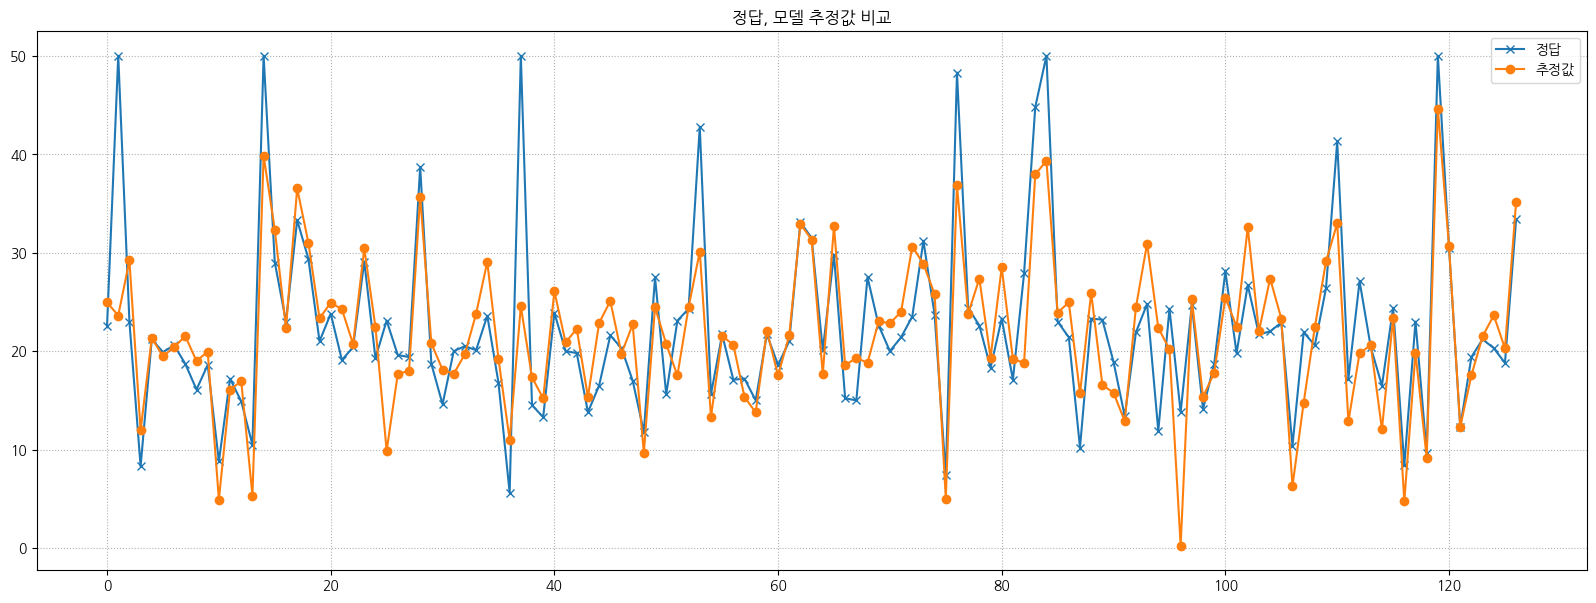

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
x= range(len(y_test))
plt.plot(x,y_test, marker='x',label = '정답')
plt.plot(x,pred_test, marker='o',label='추정값')
plt.legend()
plt.grid(True,linestyle=":")
plt.title("정답, 모델 추정값 비교")
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 입력데이터(X)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
# X**2 +X+2 -> 우리가 찾아야 하는 함수
def func(X): # 공식     # 노이즈 추가
    return X**2 +X +2 + np.random.normal(0,1,(X.size,1))


m = 100 # 데이터 개수
X= 6* np.random.rand(m,1)-3 # X값
y= func(X)

In [60]:
X.shape

(100, 1)

In [65]:
y.shape

(100, 1)

In [66]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


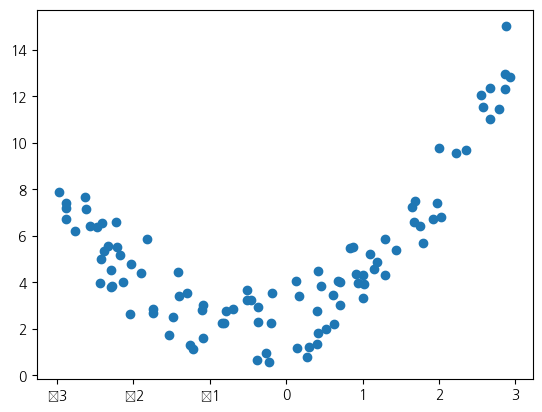

In [67]:
plt.scatter(X,y)

In [68]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
lr.fit(X,y)

print_metrics_regression(y,lr.predict(X))

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R2: 0.19138252437306003


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


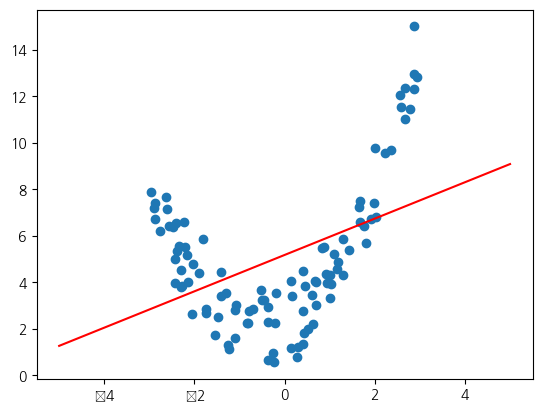

In [89]:
X_new= np.linspace(-5,5, 1000).reshape(-1,1)
X_new.shape

pred= lr.predict(X_new)
plt.scatter(X,y)
plt.plot(X_new,pred,color="red")
plt.show()

In [70]:
X.shape

(100, 1)

In [92]:
# PolynomialFeatures 를 이용해서 feature 를 N제곱한 파생변수(컬럼)을 생성
from sklearn.preprocessing import PolynomialFeatures

# 몇 제곱 까질한 파생변수들을 생성할지 최고차를 지정 degree= 4, X1, X1 **2, X1**3,X1**4
pn=PolynomialFeatures(degree=3, # 차원을 늘린다
                      
include_bias=False # True(기본값) - 상수항 컬럼 생성 --> 모든 값이 1
                     )
X_poly= pn.fit_transform(X) # fit(), transform()
X.shape, X_poly.shape

((100, 1), (100, 3))

In [95]:
X[:4]**3

array([[0.02512313],
       [2.15236624],
       [0.23440606],
       [0.01953011]])

In [94]:
X_poly[:4]

array([[0.29288102, 0.08577929, 0.02512313],
       [1.2911362 , 1.66703268, 2.15236624],
       [0.61658026, 0.38017121, 0.23440606],
       [0.2692991 , 0.072522  , 0.01953011]])

##### 모델생성, 학습

In [98]:
lr = LinearRegression()
lr.fit(X_poly,y)
lr.coef_, lr.intercept_
pred2=lr.predict(X_new_poly)

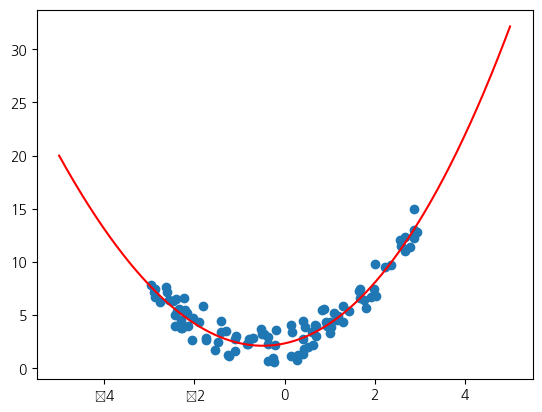

In [104]:
plt.scatter(X,y, label='정답')
plt.plot(X_new,pred2,color='red',label='추정') # 틀리는 이유 노이즈때문에

In [97]:
X_new_poly= pn.transform(X_new)

In [105]:
print_metrics_regression(y,lr.predict(X_poly),'평가')

============평가============
MSE: 0.9711464556716113
RMSE: 0.9854676329903541
R2: 0.8984001563225451


# degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다

In [115]:
pn2= PolynomialFeatures(degree=20,include_bias=False)
X_poly2= pn2.fit_transform(X)
print(X.shape,X_poly2.shape)
pn2.get_feature_names_out() # 변환된 Feature가 어떤 연산을 통해 생성됬는지를 알려준다.

(100, 1) (100, 20)


array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15',
       'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20'], dtype=object)

In [116]:
lr3 =LinearRegression()
lr3.fit(X_poly2,y)
print(lr3.coef_)
print(lr3.intercept_)

[[-3.28569719e-01  6.47675086e+00  3.16913237e+00 -1.29665719e+01
  -2.54852646e+00  1.50464293e+01  6.72958095e-01 -1.03986776e+01
   2.11228012e-01  4.51332935e+00 -1.99218183e-01 -1.24633707e+00
   5.91377751e-02  2.17033007e-01 -8.79464040e-03 -2.29624945e-02
   6.58302416e-04  1.34346913e-03 -1.97145312e-05 -3.32666696e-05]]
[1.79883353]


In [109]:
print_metrics_regression(y,lr3.predict(X_poly2))
# degree 20 

MSE: 0.8696999689280741
RMSE: 0.9325770579035676
R2: 0.9090133312299719


In [114]:
print_metrics_regression(y,lr3.predict(X_poly2))
# degree 50 
# degree가 높다고 좋은것은 아니다

MSE: 2.0968563928775894
RMSE: 1.4480526208938642
R2: 0.7806301197041348


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


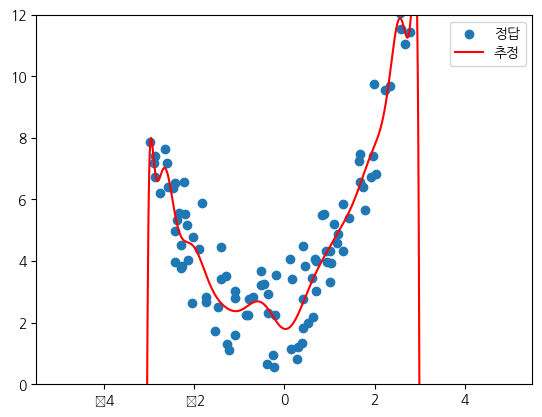

In [125]:
X_new_3= pn2.transform(X_new)
pred_3= lr3.predict(X_new_3)
plt.scatter(X,y, label='정답')
plt.plot(X_new,pred_3,label='추정',color='red')
plt.legend()
# plt.xlim(-3,3)
plt.ylim(0,12) # train set 범위 안에서는 다 맞췄지만 그 이외의 데이터가 들어올경우 train set에만 적합되고 이외의 값들에겐 큰 오차가 난다(과적합)
plt.show()

##### PolynomialFeatures를 이용해 다항회귀구현

##### LinearRegression 모델을 이용해 평가

##### 시각화

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

### PolynomialFeatures 예제

In [136]:
data = np.arange(12).reshape(6,2) # data 6개 ,feature 2개
data.shape
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [142]:
# pn= PolynomialFeatures(degree=2,include_bias=False)
pn= PolynomialFeatures(degree=3,include_bias=False)
data_poly= pn.fit_transform(data) 
data_poly.shape

(6, 9)

In [143]:
pn.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [153]:
data_poly[:,:6]

array([[   0.,    1.,    0.,    0.,    1.,    0.],
       [   2.,    3.,    4.,    6.,    9.,    8.],
       [   4.,    5.,   16.,   20.,   25.,   64.],
       [   6.,    7.,   36.,   42.,   49.,  216.],
       [   8.,    9.,   64.,   72.,   81.,  512.],
       [  10.,   11.,  100.,  110.,  121., 1000.]])

### PolynomialFeatures를 Boston Dataset에 적용

In [169]:
X_train, X_test,y_train, y_test = get_boston_dataset()
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled_= scaler.transform(X_test)

pn= PolynomialFeatures(degree=2, include_bias=False)
X_train_poly=pn.fit_transform(X_train)
X_test_poly=pn.transform(X_test)

scaler= StandardScaler()
X_train_scaled_poly= scaler.fit_transform(X_train_poly)
X_test_scaled_poly= scaler.transform(X_test_poly)
X_train.shape, X_train_poly.shape, X_train_scaled_poly.shape

((379, 13), (379, 104), (379, 104))

In [162]:
lr= LinearRegression()
lr.fit(X_train_scaled_poly,y_train)

LinearRegression()

In [164]:
pred_train= lr.predict(X_train_scaled_poly)
pred_test= lr.predict(X_test_scaled_poly)
print_metrics_regression(y_train,pred_train,"train set")
print_metrics_regression(y_test,pred_test,'test set')

============train set============
MSE: 4.0903626125437675
RMSE: 2.022464489810332
R2: 0.952051960903273
============test set============
MSE: 32.069135121580665
RMSE: 5.662961691692843
R2: 0.6074721959666054


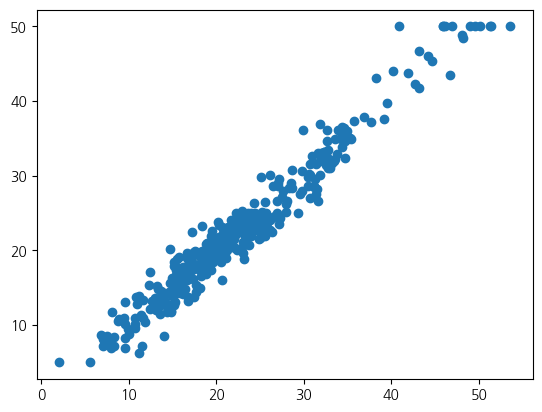

In [180]:
plt.scatter(pred_train,y_train)

In [170]:
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
print_metrics_regression(y_train, lr2.predict(X_train_scaled),'train')
print_metrics_regression(y_test, lr2.predict(X_test_scaled),'test')

============train============
MSE: 19.640519427908043
RMSE: 4.431762564477935
R2: 0.7697699488741149
============test============
MSE: 29.782245092302325
RMSE: 5.457311159564051
R2: 0.6354638433202133


##### 모델 생성 학습 추론 평가

In [171]:
# pipeline 적용
from sklearn.pipeline import make_pipeline
pipeline =make_pipeline(PolynomialFeatures(degree=2, include_bias=False),StandardScaler(),LinearRegression())
pipeline.steps

[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
 ('standardscaler', StandardScaler()),
 ('linearregression', LinearRegression())]

In [172]:
pipeline.fit(X_train,y_train)
pred_test= pipeline.predict(X_test)
print_metrics_regression(y_test,pred_test,'pipeline')

============pipeline============
MSE: 32.069135121580665
RMSE: 5.662961691692843
R2: 0.6074721959666054


In [173]:
pipeline =make_pipeline(PolynomialFeatures(degree=2, include_bias=False),StandardScaler())
result=pipeline.fit_transform(X_train)

In [174]:
result.shape

(379, 104)

In [178]:
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,-0.390600,0.426370,-0.744914,-0.265747,-1.078733,-1.021961,0.051970,1.994571,-0.278328,-0.427994,0.278789,0.340496,0.822121,-0.158126,1.296205,-0.396298,-0.154239,-0.395839,-0.386400,-0.385033,-0.383648,-0.375751,-0.384028,-0.385965,-0.323118,-0.343645,-0.117410,1.007797,-0.120225,0.435971,0.263396,1.407172,0.549842,1.136515,0.533200,0.550644,0.427012,2.175611,-0.779154,-0.239500,-0.829408,-0.837216,-0.642378,1.054426,-0.563493,-0.702103,-0.702664,-0.563725,-0.367235,-0.265747,-0.258497,-0.263043,-0.254935,-0.247625,-0.199569,-0.242714,-0.264147,-0.265482,-0.222551,-0.986635,-1.484702,-0.477152,2.023358,-0.458894,-0.680184,-0.796513,-0.467057,0.089437,-0.994608,-0.203005,1.463917,-0.359348,-0.641477,-0.607292,-0.145449,0.698573,-0.171881,3.690432,-0.312571,-0.333382,0.095849,0.281827,0.385191,2.108075,1.515439,2.146563,2.190005,1.928037,4.986363,-0.473428,-0.441849,-0.272014,-0.106174,-0.093978,-0.521237,-0.350277,-0.148356,0.072665,0.235830,0.456192,0.777218,0.364188,1.125227,0.563744
1,-0.401276,0.552534,-0.849018,-0.265747,-0.889119,-0.556963,-0.764286,1.505651,-0.162916,-0.696853,0.552877,0.427749,-0.462417,-0.158178,0.640388,-0.400246,-0.154239,-0.402183,-0.395561,-0.395996,-0.445114,-0.378322,-0.390154,-0.395676,-0.334856,-0.356968,-0.042879,0.999910,-0.120225,0.621394,0.415548,0.949668,0.540189,1.624851,0.510799,0.730894,0.574296,1.019797,-0.824557,-0.239500,-0.868753,-0.895241,-0.870783,0.272942,-0.563379,-0.800283,-0.779930,-0.656474,-0.727829,-0.265747,-0.258497,-0.263043,-0.254935,-0.247625,-0.199569,-0.242714,-0.264147,-0.265482,-0.222551,-0.846591,-1.111905,-0.884215,1.637687,-0.361138,-0.776724,-0.533506,-0.265173,-0.617632,-0.580260,-0.851749,1.213076,-0.205675,-0.802332,0.040285,0.125175,-0.549742,-0.957828,1.204672,-0.447232,-0.798279,-0.617166,-0.452247,-0.688785,1.388318,1.503381,1.054881,1.783316,1.535301,1.127694,-0.411491,-0.447797,-0.138608,0.045397,-0.382551,-0.698683,-0.538074,-0.387090,-0.614995,0.538340,0.668975,-0.382412,0.515000,-0.227972,-0.531723
2,-0.401105,1.183350,-0.666480,3.762978,-0.940832,1.378122,-0.700406,0.480493,-0.624563,-0.872196,-0.406431,0.341844,-0.903108,-0.158177,1.287476,-0.399303,-0.017448,-0.402181,-0.392602,-0.395669,-0.461490,-0.380363,-0.390650,-0.396827,-0.334940,-0.358615,0.472494,2.508335,10.005361,1.280888,1.287558,1.928957,0.642992,1.200211,0.939205,1.258182,1.185171,1.095483,-0.740962,1.651123,-0.763184,-0.510533,-0.773672,-0.071703,-0.651520,-0.765032,-0.696334,-0.482147,-0.778285,3.762978,2.751547,4.177364,2.236595,5.568757,1.055813,2.180296,3.712303,3.814327,1.583301,-0.885476,-0.331596,-0.860299,0.299827,-0.656821,-0.884186,-0.935199,-0.362115,-0.893064,1.392556,-0.416300,0.761911,-0.550325,-0.645182,0.783326,0.877340,-0.822860,-0.907427,0.209077,-0.662122,-0.843944,-0.734169,-0.423206,-0.861895,0.200273,-0.414294,-0.196971,0.400050,0.522144,-0.498438,-0.609691,-0.644400,-0.625344,-0.498096,-0.640426,-0.800085,-0.836236,-0.597783,-0.829169,-0.479512,0.136048,-0.892209,0.366495,-0.728888,-0.739052
3,0.643120,-0.498828,1.000608,-0.265747,1.179393,0.228624,1.066967,-0.982823,1.683670,1.535846,0.781284,0.372500,0.635835,-0.007314,-0.400209,0.649525,-0.154239,0.663637,0.714910,0.701196,0.647335,0.665635,0.656478,0.647788,0.849361,0.408854,-0.373247,-0.509691,-0.120225,-0.518006,-0.491157,-0.531821,-0.439341,-0.498350,-0.483212,-0.496950,-0.498993,-0.497200,0.880561,-0.239500,1.124024,1.167183,1.215934,-0.032876,1.688011,1.381561,1.101472,1.264832,0.827478,-0.265747,-0.258497,-0.263043,-0.254935,-0.247625,-0.199569,-0.242714,-0.264147,-0.265482,-0.222551,1.133946,1.380284,1.275579,-0.962669,1.733766,1.590115,1.395145,1.269699,0.820508,0.172326,1.199628,-0.930418,1.8

In [175]:
result.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [181]:
from sklearn.linear_model import Ridge,Lasso


In [ ]:
alpha = 1 # 규제항의 값을 조정하는 하이퍼 파라미터,  기본값: 1 - 클수록 강한 규제
# overfitting : alpha를 줄인다, underfitting : alpha를 키운다
ridge= Ridge(alpha=alpha,random_state=0)
ridge.fit(X_train_scaled,y_train)
print_metrics_regression(y_train,ridge.predict(X_train_scaled))
print_metrics_regression(y_test,ridge.predict(X_test_scaled))

In [185]:
alpha_list=[0.001,0.01,0.1,1,10,100,500,1000]
# alpha의 변화에 따른 weight의 변화를 저장할 Data Frame
coef_df=pd.DataFrame()
bias_list= []
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha,random_state=0)
    ridge.fit(X_train_scaled,y_train)
    # 컬럼 추가
    coef_df[f"alpha:{alpha}"] =ridge.coef_
    bias_list.append(ridge.intercept_)
    
    print(f"-------------{alpha}--------------")
    print_metrics_regression(y_train,ridge.predict(X_train_scaled),"train")
    print_metrics_regression(y_test,ridge.predict(X_test_scaled),"test")

-------------0.001--------------
============train============
MSE: 19.64051942942513
RMSE: 4.4317625646490955
R2: 0.7697699488563313
============test============
MSE: 29.78231701652623
RMSE: 5.457317749272643
R2: 0.6354629629641464
-------------0.01--------------
============train============
MSE: 19.6405195795332
RMSE: 4.431762581584578
R2: 0.7697699470967347
============test============
MSE: 29.782964300126405
RMSE: 5.457377053138844
R2: 0.6354550401807848
-------------0.1--------------
============train============
MSE: 19.64053450797884
RMSE: 4.43176426584028
R2: 0.769769772102544
============test============
MSE: 29.78943370556662
RMSE: 5.457969742089692
R2: 0.6353758543374117
-------------1--------------
============train============
MSE: 19.641949353818955
RMSE: 4.431923888540839
R2: 0.76975318699993
============test============
MSE: 29.853763334547597
RMSE: 5.46385974696895
R2: 0.6345884564889055
-------------10--------------
============train============
MSE: 19.7337171201375

In [186]:
bias_list

[22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557,
 22.608707124010557]

In [187]:
coef_df

,alpha:0.001,alpha:0.01,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:500,alpha:1000
0,-0.970992,-0.970907,-0.970063,-0.961875,-0.898519,-0.702647,-0.534735,-0.442678
1,1.046659,1.046484,1.044735,1.027755,0.895907,0.542402,0.432019,0.382202
2,-0.040477,-0.040742,-0.043379,-0.068611,-0.241628,-0.539236,-0.571494,-0.512882
3,0.594092,0.594130,0.594509,0.598141,0.623200,0.643067,0.469501,0.333552
4,-1.808732,-1.808405,-1.805134,-1.773184,-1.512895,-0.685798,-0.406040,-0.371299
5,2.609931,2.610030,2.611019,2.620567,2.689748,2.650139,1.776278,1.253866
6,-0.198240,-0.198300,-0.198901,-0.204668,-0.245227,-0.308313,-0.332627,-0.327295
7,-3.002128,-3.001789,-2.998407,-2.965049,-2.671723,-1.379397,-0.332010,-0.062878
8,2.080133,2.079392,2.072006,2.000910,1.486602,0.301828,-0.209340,-0.283024
9,-1.932813,-1.932113,-1.925143,-1.858407,-1.398256,-0.630364,-0.526917,-0.477386


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [190]:
alpha_list2= [0.001,0.01,0.1,1,5,10]

coef_df2=pd.DataFrame()
bias_list2=[]
for alpha in alpha_list2:
    
    lasso= Lasso(alpha=alpha,random_state=0)
    lasso.fit(X_train_scaled,y_train)
    coef_df2[f'alpa:{alpha}']=lasso.coef_
    bias_list2.append(lasso.intercept_)
    
    print(f"--------alpha {alpha}---------------------------")
    print_metrics_regression(y_train,lasso.predict(X_train_scaled), "train")
    print_metrics_regression(y_test,lasso.predict(X_test_scaled),"test")

--------alpha 0.001---------------------------
============train============
MSE: 19.64056676571224
RMSE: 4.431767905217086
R2: 0.7697693939710166
============test============
MSE: 29.791255130183576
RMSE: 5.45813659871055
R2: 0.635353560009785
--------alpha 0.01---------------------------
============train============
MSE: 19.645244078522445
RMSE: 4.432295576619687
R2: 0.769714565585679
============test============
MSE: 29.87683157624681
RMSE: 5.465970323396095
R2: 0.6343061000666703
--------alpha 0.1---------------------------
============train============
MSE: 20.105612524082833
RMSE: 4.483928246981973
R2: 0.7643180356646064
============test============
MSE: 31.173724839373957
RMSE: 5.583343517944598
R2: 0.6184320622196556
--------alpha 1---------------------------
============train============
MSE: 25.387938444332313
RMSE: 5.038644504659196
R2: 0.702397567056503
============test============
MSE: 35.489636168280335
RMSE: 5.957317866983458
R2: 0.5656050935497575
--------alpha 5------

In [191]:
coef_df2

,alpa:0.001,alpa:0.01,alpa:0.1,alpa:1,alpa:5,alpa:10
0,-0.967848,-0.939492,-0.659315,-0.000000,-0.000000,-0.0
1,1.043088,1.010377,0.684820,0.000000,0.000000,0.0
2,-0.042280,-0.057475,-0.207389,-0.000000,-0.000000,-0.0
3,0.593919,0.592324,0.575874,0.000000,0.000000,0.0
4,-1.804056,-1.761604,-1.345790,-0.000000,-0.000000,-0.0
5,2.611194,2.622904,2.738958,2.529330,0.374985,0.0
6,-0.196298,-0.179110,-0.007398,-0.000000,-0.000000,-0.0
7,-2.994364,-2.923287,-2.216914,-0.000000,0.000000,0.0
8,2.065494,1.933983,0.632402,-0.000000,-0.000000,-0.0
9,-1.920598,-1.811185,-0.724794,-0.227631,-0.000000,-0.0


In [197]:
# boston set 에 polynormial feature를 적용한 데이터 셋
X_train_scaled_poly.shape

(379, 104)

In [195]:
from sklearn.metrics import r2_score

In [204]:
X_train_scaled.shape

(379, 13)

In [206]:
train_r2_list=[]
test_r2_list=[]
alpha_list= [0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
    
    ridge= Ridge(alpha=alpha,random_state=0)
    ridge.fit(X_train_scaled_poly,y_train)
    
    train_r2_list.append(r2_score(y_train,ridge.predict(X_train_scaled_poly)))
    test_r2_list.append(r2_score(y_test,ridge.predict(X_test_scaled_poly)))

--------alpha 0.01---------------------------
============train============
MSE: 85.30823553163789
RMSE: 9.236245748768159
R2: 0.0
============test============
MSE: 81.7904659829155
RMSE: 9.043808157126925
R2: -0.001119359203955339
--------alpha 0.1---------------------------
============train============
MSE: 85.30823553163789
RMSE: 9.236245748768159
R2: 0.0
============test============
MSE: 81.7904659829155
RMSE: 9.043808157126925
R2: -0.001119359203955339
--------alpha 1---------------------------
============train============
MSE: 85.30823553163789
RMSE: 9.236245748768159
R2: 0.0
============test============
MSE: 81.7904659829155
RMSE: 9.043808157126925
R2: -0.001119359203955339
--------alpha 10---------------------------
============train============
MSE: 85.30823553163789
RMSE: 9.236245748768159
R2: 0.0
============test============
MSE: 81.7904659829155
RMSE: 9.043808157126925
R2: -0.001119359203955339
--------alpha 100---------------------------
============train============
MSE

In [209]:
np.log10(alpha_list)

array([-2., -1.,  0.,  1.,  2.,  3.])

In [213]:
result= pd.DataFrame({'train':train_r2_list,
                     'test':test_r2_list},
                    index=np.log10(alpha_list))
result

,train,test
-2.0,0.950751,0.632598
-1.0,0.944655,0.674412
0.0,0.931780,0.761603
1.0,0.898743,0.766252
2.0,0.826360,0.690952
3.0,0.731646,0.581293


<Axes: >

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


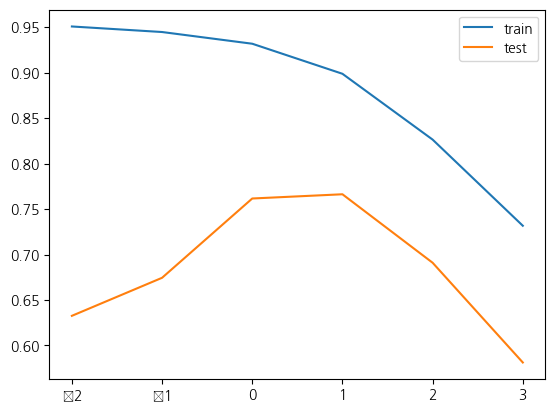

In [214]:
result.plot()

In [215]:
np.min(y),np.max(y)

(0.5518093981997281, 15.001579381231853)

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 